In [235]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [295]:
df = pd.read_csv('House_Rent_Dataset.csv')

In [317]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,rent_log
0,2022-05-18,2,10000,1100,0,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,9.210440
1,2022-05-13,2,20000,800,1,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,9.903538
2,2022-05-16,2,17000,1000,1,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,9.741027
3,2022-07-04,2,10000,800,1,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,9.210440
4,2022-05-09,2,7500,850,1,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,8.922792


In [299]:
df.shape

(4746, 12)

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [301]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [302]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

EDA START

In [303]:
df['rent_log'] = np.log1p(df['Rent'])

<Axes: xlabel='rent_log', ylabel='Count'>

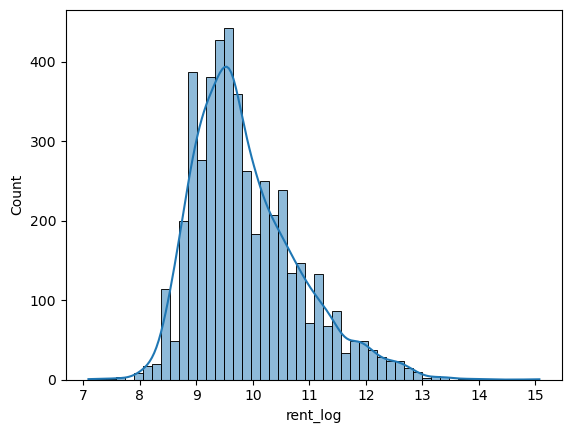

In [304]:
sns.histplot(df['rent_log'],bins=50,kde=True)

<Axes: xlabel='Size', ylabel='rent_log'>

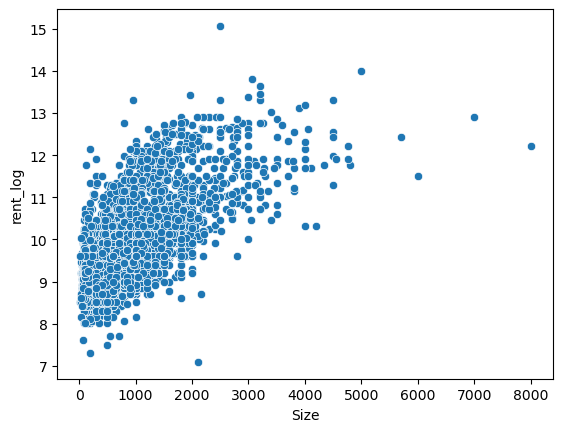

In [305]:
sns.scatterplot(data=df,x = 'Size', y = 'rent_log')

<Axes: >

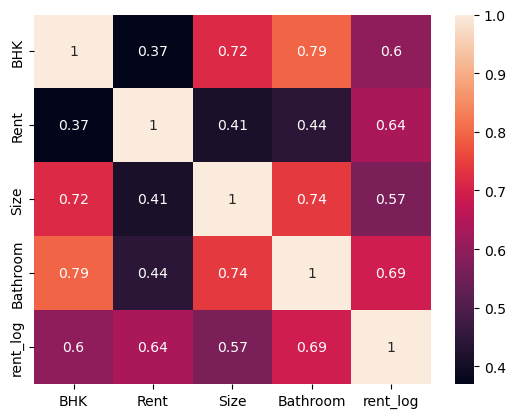

In [306]:
sns.heatmap(df.corr(numeric_only = True),annot=True)

In [307]:
df = df[df['Rent']<2000000]

In [360]:
df = df.drop(['Posted On', 'Area Locality'], axis=1)

In [361]:
X = df.drop(columns = ['Rent','rent_log'],axis=1)
y = df['rent_log']

In [362]:
df.columns

Index(['BHK', 'Rent', 'Size', 'Floor', 'Area Type', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact',
       'rent_log'],
      dtype='object')

In [363]:
def clean_floor(x):
    try:
        if 'Ground' in x:
            return 0
        elif 'Basement' in x:
            return -1
        else:
            return int(x.split()[0]) # Extracts '1' from '1 out of 3'
    except:
        return 0

df['Floor'] = df['Floor'].apply(clean_floor)

In [364]:
# encoding the values with one hot encoding

In [366]:
X_one_code = pd.get_dummies(X, columns= ['Area Type','City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'],drop_first = True)

In [367]:
X_one_code = X_one_code.astype(int)

In [368]:
X_one_code

,BHK,Size,Floor,Bathroom,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,1100,0,2,0,1,0,0,0,1,0,0,1,1,0,0,1
1,2,800,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1
2,2,1000,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1
3,2,800,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1
4,2,850,1,1,1,0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,1000,3,2,1,0,0,0,1,0,0,1,0,1,0,0,1
4742,3,2000,1,3,0,1,0,0,1,0,0,1,0,1,0,0,1
4743,3,1750,3,3,1,0,0,0,1,0,0,1,0,1,0,0,0
4744,3,1500,23,2,1,0,0,0,1,0,0,1,0,0,1,0,0


In [369]:
from sklearn.preprocessing import StandardScaler

In [370]:
numericals_cols = ['BHK', 'Size','Bathroom','Floor']

scaler = StandardScaler()

X_one_code[numericals_cols] = scaler.fit_transform(X_one_code[numericals_cols])

In [371]:
X_one_code

,BHK,Size,Floor,Bathroom,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,-0.100543,0.209577,-0.595700,0.038842,0,1,0,0,0,1,0,0,1,1,0,0,1
1,-0.100543,-0.263750,-0.422448,-1.091863,0,1,0,0,0,1,0,1,0,1,0,0,1
2,-0.100543,0.051801,-0.422448,-1.091863,0,1,0,0,0,1,0,1,0,1,0,0,1
3,-0.100543,-0.263750,-0.422448,-1.091863,0,1,0,0,0,1,0,0,1,1,0,0,1
4,-0.100543,-0.184862,-0.422448,-1.091863,1,0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,-0.100543,0.051801,-0.075946,0.038842,1,0,0,0,1,0,0,1,0,1,0,0,1
4742,1.101164,1.629556,-0.422448,1.169547,0,1,0,0,1,0,0,1,0,1,0,0,1
4743,1.101164,1.235118,-0.075946,1.169547,1,0,0,0,1,0,0,1,0,1,0,0,0
4744,1.101164,0.840679,3.389081,0.038842,1,0,0,0,1,0,0,1,0,0,1,0,0


In [372]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [373]:
# model of one hot encoding

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X_one_code, y, test_size=0.33, random_state=42)

In [375]:
model = LinearRegression()

In [376]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [377]:
y_pred = model.predict(X_test)

In [378]:
y_pred

array([ 9.57990358,  8.88662995, 10.32628034, ...,  9.52842799,
        9.41504459,  9.48941438], shape=(1566,))

In [379]:
y_test

1498     9.472782
3442     8.699681
1075    10.905974
3771     9.998843
1588    10.203629
          ...    
1744     8.699681
411      8.779711
4039     9.893488
2192     9.433564
3163     9.305741
Name: rent_log, Length: 1566, dtype: float64

In [380]:
r2 = r2_score(y_test,y_pred)
r2

0.8254406555652307

In [381]:
y_pred_actual = np.expm1(y_pred)
y_test_actual = np.expm1(y_test)

In [382]:
y_pred_actual

array([14470.02392088,  7233.59712645, 30523.36029948, ...,
       13743.96683119, 12270.62039374, 13218.05171755], shape=(1566,))

In [383]:
y_test_actual

1498    13000.0
3442     6000.0
1075    54500.0
3771    22000.0
1588    27000.0
         ...   
1744     6000.0
411      6500.0
4039    19800.0
2192    12500.0
3163    11000.0
Name: rent_log, Length: 1566, dtype: float64

In [384]:
from sklearn.ensemble import RandomForestRegressor

In [385]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

In [386]:
rf_model.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [387]:
y_pred = rf_model.predict(X_test)

In [388]:
y_pred

array([ 9.12052524,  8.85610439, 10.67884957, ...,  9.63082379,
        9.3310366 ,  9.47594336], shape=(1566,))

In [389]:
y_test

1498     9.472782
3442     8.699681
1075    10.905974
3771     9.998843
1588    10.203629
          ...    
1744     8.699681
411      8.779711
4039     9.893488
2192     9.433564
3163     9.305741
Name: rent_log, Length: 1566, dtype: float64

In [390]:
r2 = r2_score(y_test,y_pred)
r2

0.8105072619875184

In [391]:
from xgboost import XGBRegressor

In [401]:
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05,max_depth=5,
                          eval_metric='mlogloss',random_state=42)

In [402]:
xgb_model.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [403]:
xg_y_pred = xgb_model.predict(X_test)

In [404]:
xg_y_pred

array([ 9.413159,  9.122463, 10.4045  , ...,  9.467256,  9.278622,
        9.531812], shape=(1566,), dtype=float32)

In [405]:
y_test

1498     9.472782
3442     8.699681
1075    10.905974
3771     9.998843
1588    10.203629
          ...    
1744     8.699681
411      8.779711
4039     9.893488
2192     9.433564
3163     9.305741
Name: rent_log, Length: 1566, dtype: float64

In [406]:
r2 = r2_score(y_test,xg_y_pred)
r2

0.8101049552697526

In [398]:
import joblib

In [407]:
joblib.dump(model ,'House_price_prediction.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(X_one_code.columns.tolist(),'columns.pkl')

['columns.pkl']